In [1]:
from blimpy import Filterbank
import matplotlib.pyplot as plt
%matplotlib notebook

In [28]:
path_to_fil = ("../data/test-128-64.rawspec.0002.fil")

In [29]:
obs = Filterbank(path_to_fil)

In [30]:
obs.info()

   b'machine_id' :                               20
 b'telescope_id' :                                6
      b'src_raj' :                      4:15:16.248
      b'src_dej' :                      -7:39:08.64
     b'az_start' :                              0.0
     b'za_start' :                              0.0
    b'data_type' :                                1
         b'fch1' :                    1501.46484375
         b'foff' :             -0.00286102294921875
       b'nchans' :                            65536
       b'nbeams' :                                1
        b'ibeam' :                               -1
        b'nbits' :                               32
   tstart (ISOT) :          2017-05-26T14:57:28.000
    tstart (MJD) :               57899.623240740744
        b'tsamp' :              1.073741823999999 s
         b'nifs' :                                1
  b'source_name' :                 b'DIAG_HIP19849'
  b'rawdatafile' :          b'test-128-64.0000.raw'

Num ints in

In [26]:
w = 187.5/64
start_freq = 1314.3310546875

<IPython.core.display.Javascript object>


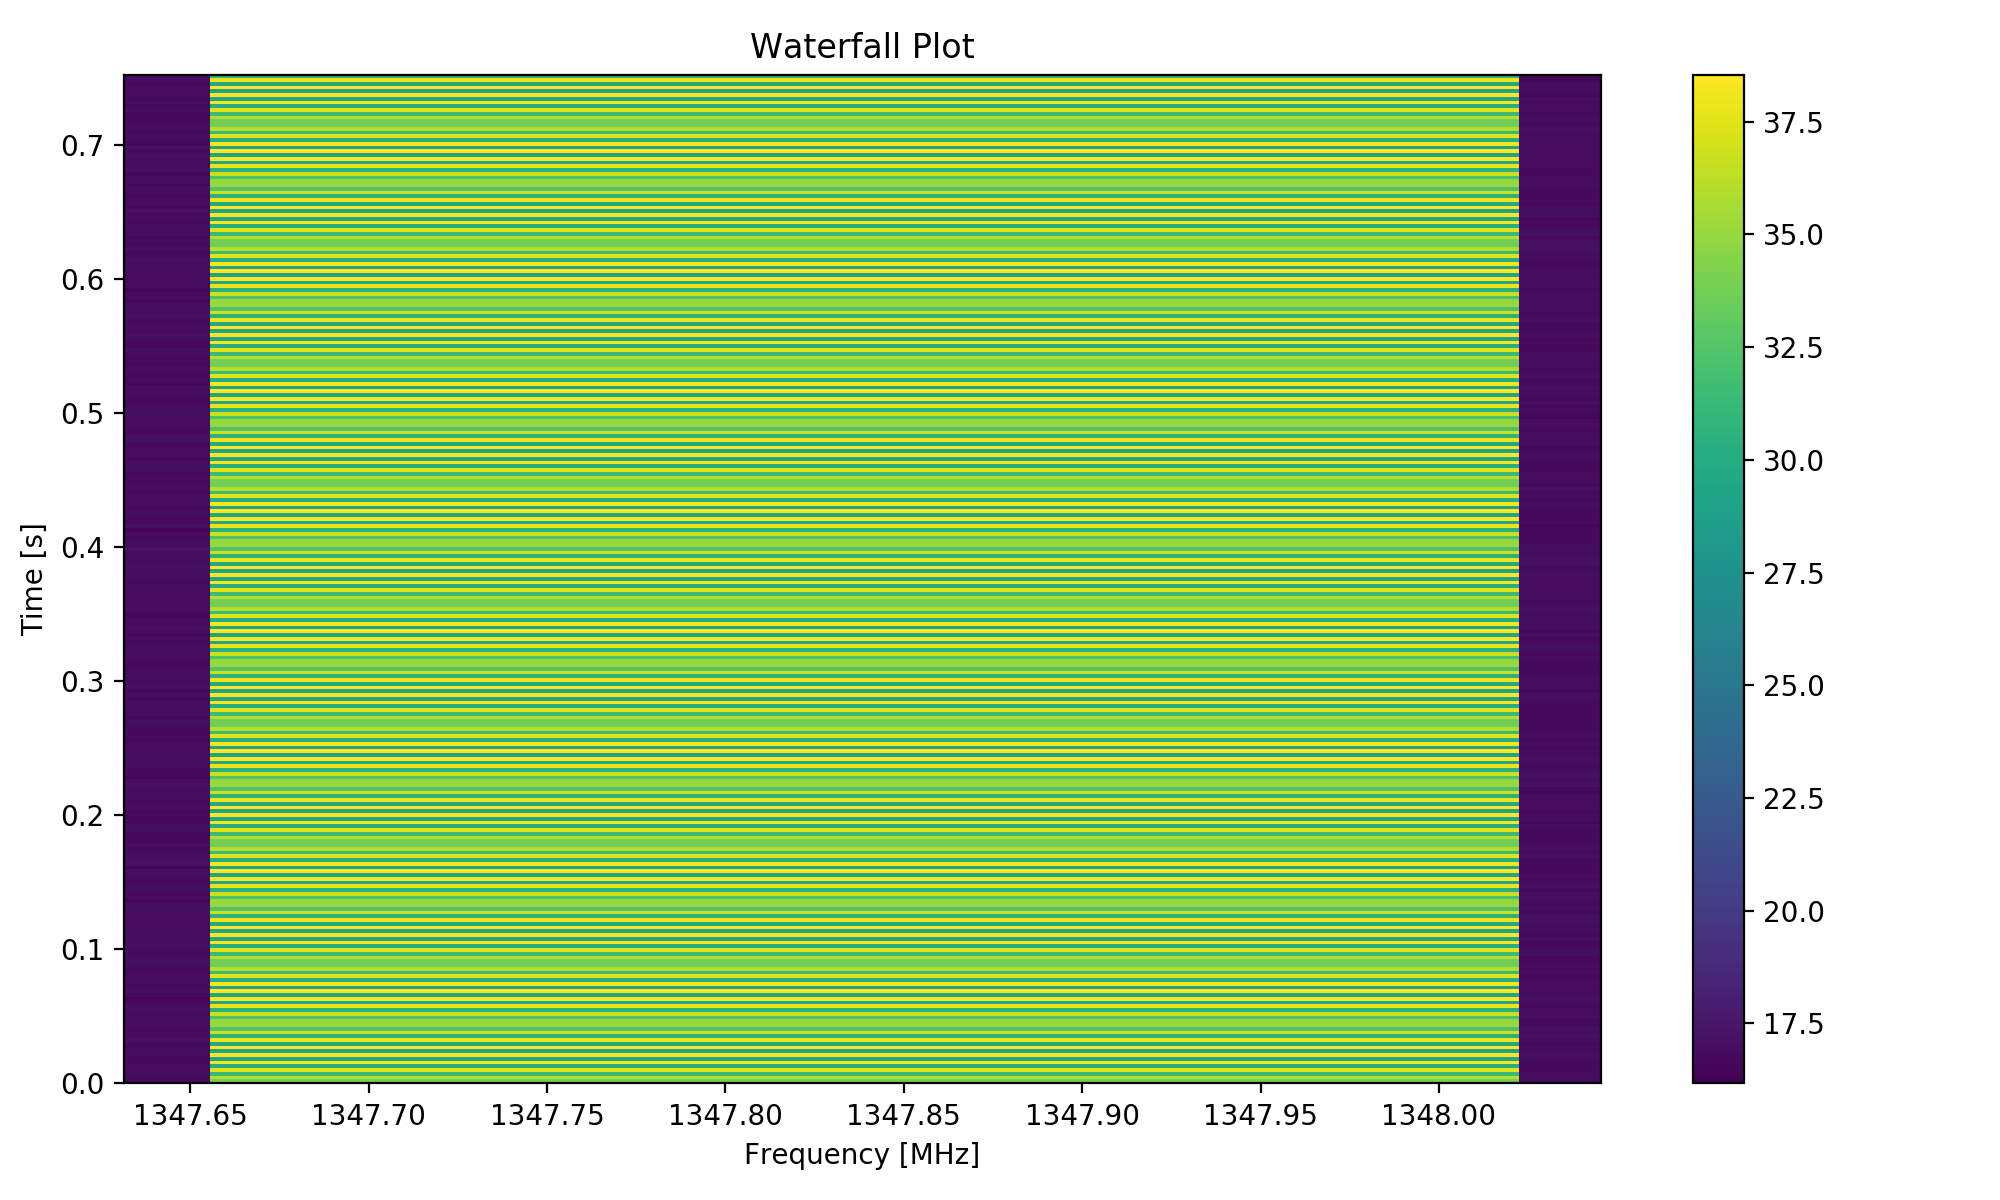

In [27]:
plt.figure(figsize=(10,6))
obs.plot_waterfall()
title = plt.title(
    "Waterfall Plot")
plt.tight_layout()

<IPython.core.display.Javascript object>


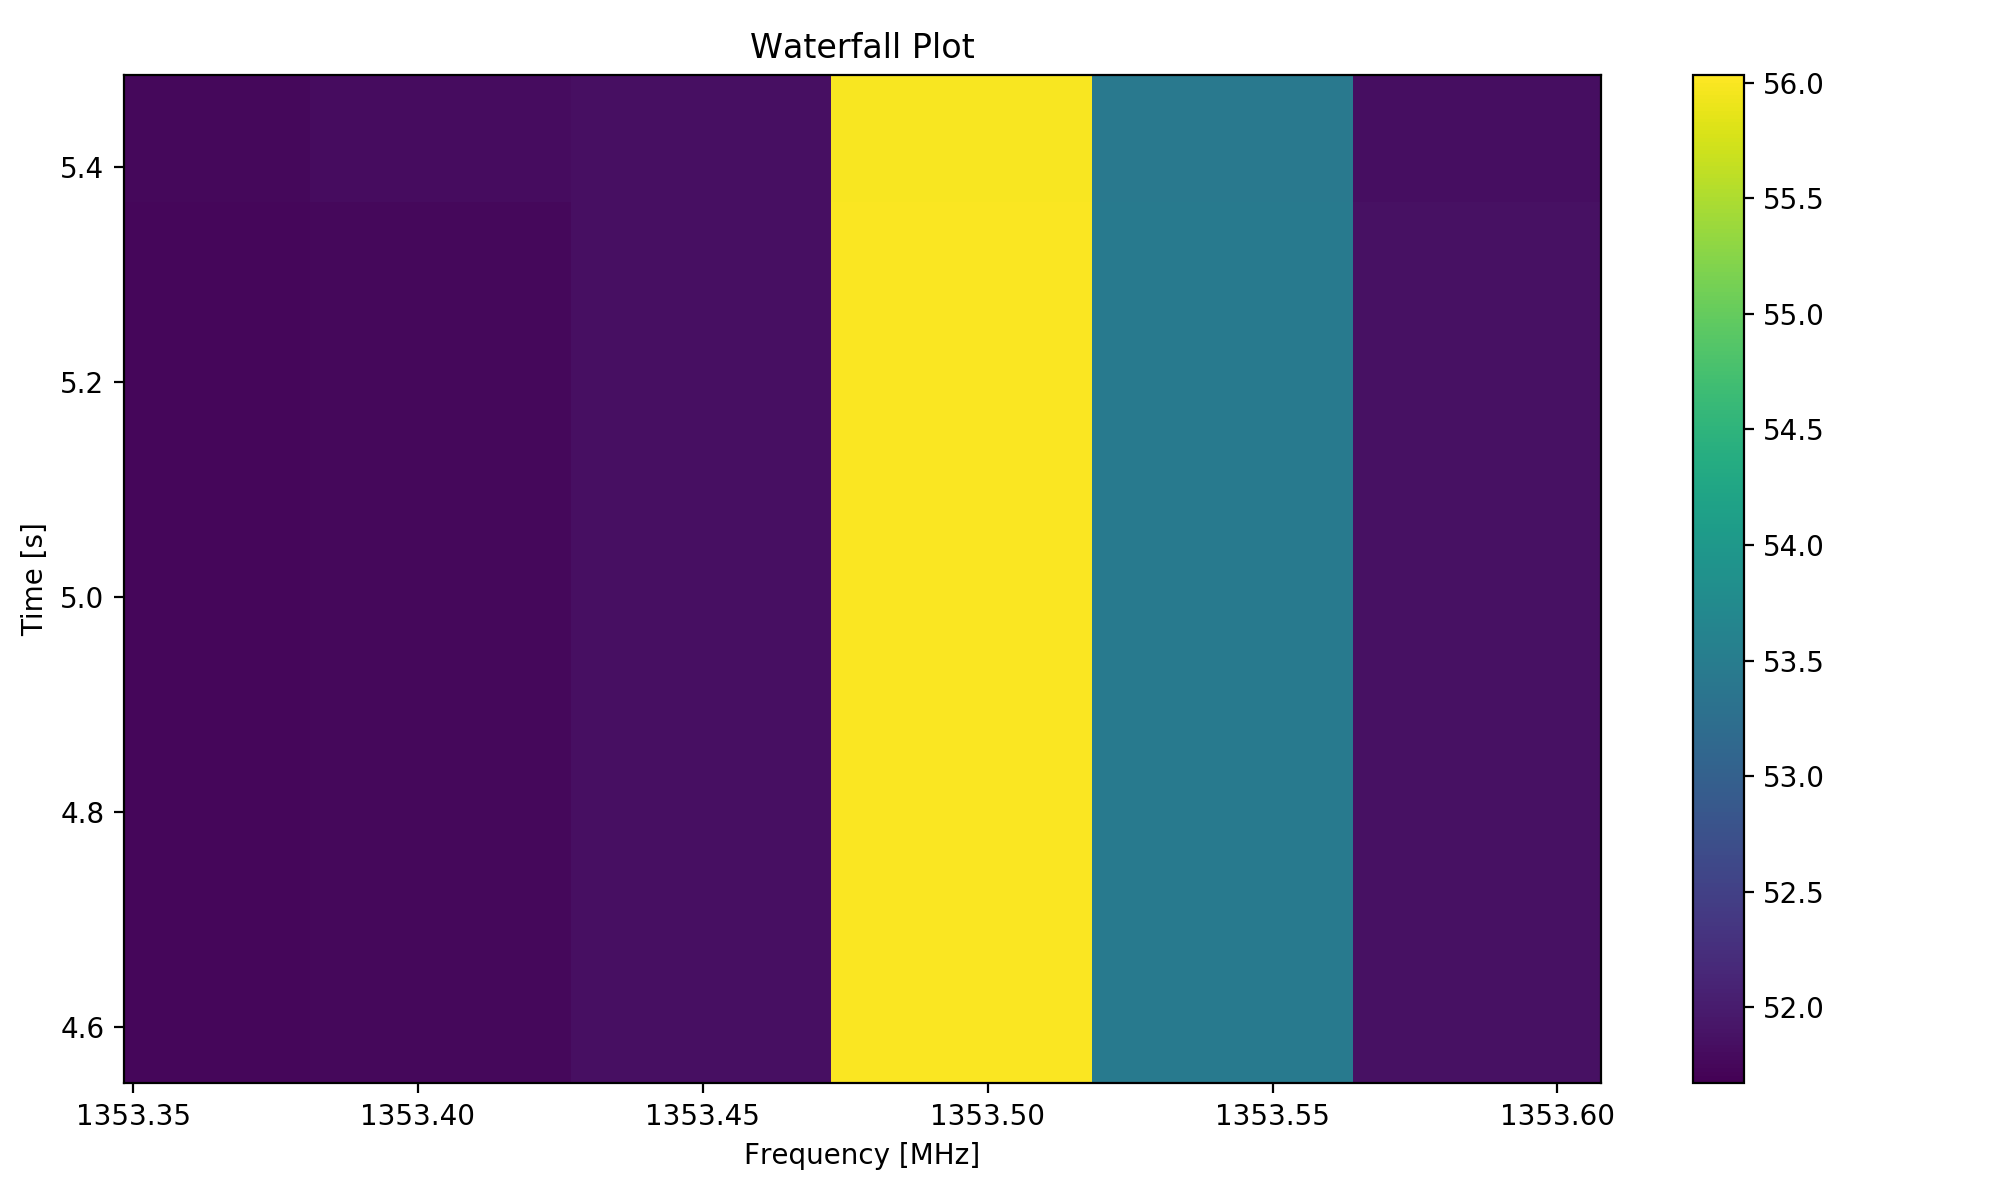

In [31]:
plt.figure(figsize=(10,6))
obs.plot_waterfall()
title = plt.title(
    "Waterfall Plot")
plt.tight_layout()

<IPython.core.display.Javascript object>


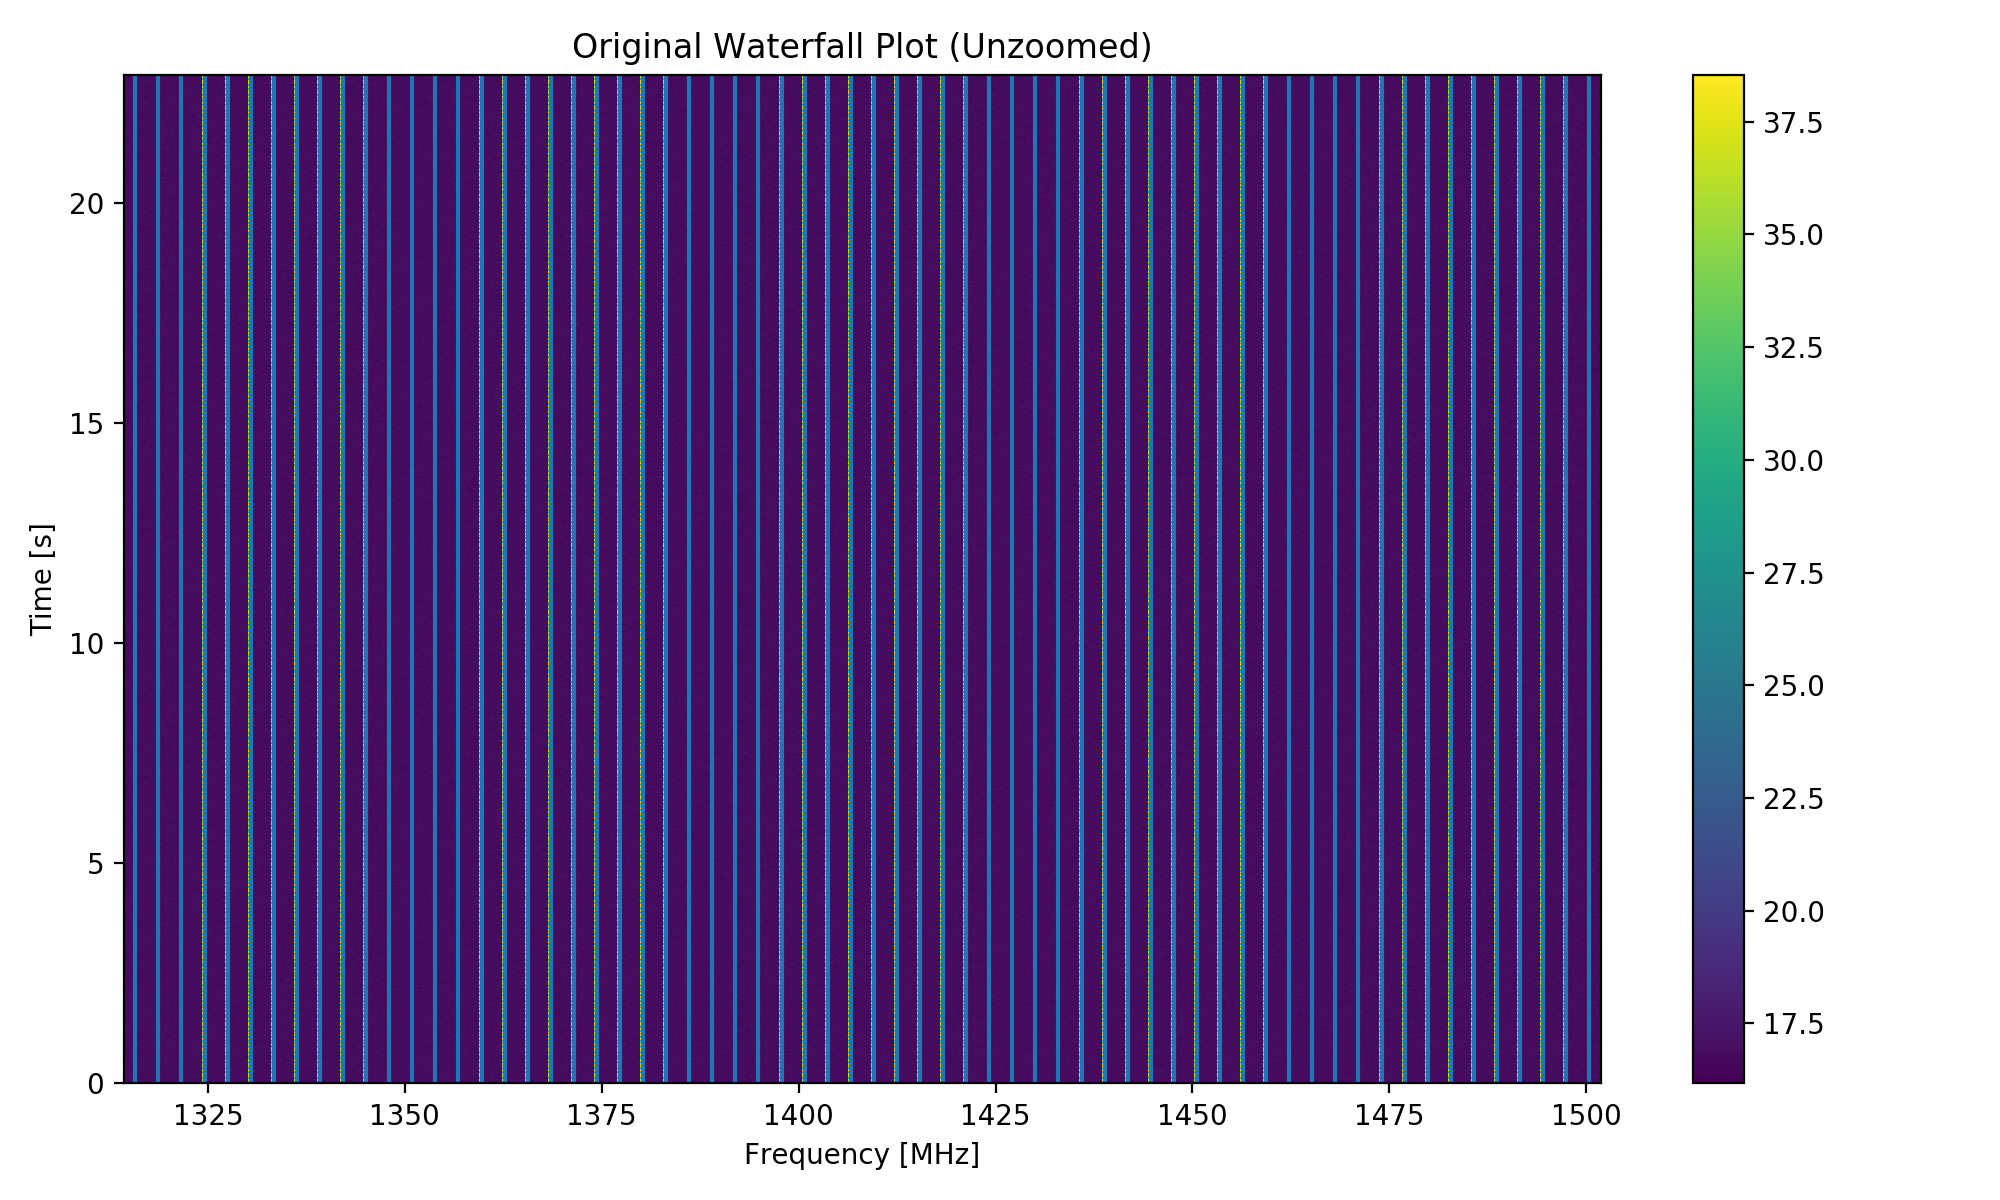

In [11]:
plt.figure(figsize=(10,6))
obs.plot_waterfall()
for i in range(64):
    plt.axvline(x = start_freq + w/2 + w*i)
title = plt.title(
    "Original Waterfall Plot (Unzoomed)")
plt.tight_layout()

In [ ]:
zoom_start_f = 1329
zoom_stop_f = 1348

In [ ]:
plt.figure(figsize=(10,6))
obs.plot_waterfall(f_start=zoom_start_f, f_stop=zoom_stop_f)
title = plt.title(
    "Zoom in to frequencies at {0}-{1} MHz".format(zoom_start_f,zoom_stop_f))

In [ ]:
plt.figure(figsize=(10,6))
obs.plot_spectrum()
title = plt.title(
    "Spectrum Graph at time 0")

In [ ]:
plt.figure(figsize=(10,6))
obs.plot_spectrum(f_start=zoom_start_f, f_stop=zoom_stop_f)
title = plt.title(
    "Spectrum Graph at time 0, zoomed in to frequencies of {0}-{1} MHz".format(zoom_start_f,zoom_stop_f))